Introdução

Análise exploratória de dados quantitativos sobre alunos de graduação da UFRGS.
Dados do período de 2010 a 2021.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dados/tlimpa.csv")

df.head()

,Unnamed: 0,CodCurso,NomeCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,0,298,ADMINISTRAÇÃO,2010,1,1501,1349,169,91,24
1,1,583,ADMINISTRAÇÃO - EAD,2010,1,351,345,1,0,6
2,2,299,AGRONOMIA,2010,1,494,448,50,31,19
3,3,300,ARQUITETURA E URBANISMO,2010,1,625,578,53,41,12
4,4,301,ARQUIVOLOGIA,2010,1,157,134,30,4,6


In [3]:
df.tail()

,Unnamed: 0,CodCurso,NomeCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
1865,1865,1490,RELAÇÕES PÚBLICAS,2021,2,288,281,24,16,5
1866,1866,806,SAÚDE COLETIVA,2021,2,269,252,23,7,6
1867,1867,907,SERVIÇO SOCIAL,2021,2,172,168,6,6,1
1868,1868,302,TEATRO,2021,2,243,230,5,6,5
1869,1869,1071,ZOOTECNIA,2021,2,261,254,24,23,6


Verificar informações sobre o dataframe e suas colunas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1870 non-null   int64 
 1   CodCurso      1870 non-null   int64 
 2   NomeCurso     1870 non-null   object
 3   Ano           1870 non-null   int64 
 4   Periodo       1870 non-null   int64 
 5   Vinculados    1870 non-null   int64 
 6   Matriculados  1870 non-null   int64 
 7   Ingressantes  1870 non-null   int64 
 8   Diplomados    1870 non-null   int64 
 9   Evadidos      1870 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 146.2+ KB


Verificar a existência de dados nulos nas colunas

In [5]:
df.isnull().sum()

Unnamed: 0      0
CodCurso        0
NomeCurso       0
Ano             0
Periodo         0
Vinculados      0
Matriculados    0
Ingressantes    0
Diplomados      0
Evadidos        0
dtype: int64

In [7]:
anos = df.Ano.unique()
evadidos_soma_total = df.Evadidos.sum()
evadidos_por_ano = df.groupby('Ano')['Evadidos'].sum()
evadidos_por_ano


Ano
2010    2312
2011    2552
2012    2468
2013    2272
2014    2638
2015    2646
2016    3450
2017    3640
2018    2992
2019    3523
2020    1594
2021    1375
Name: Evadidos, dtype: int64

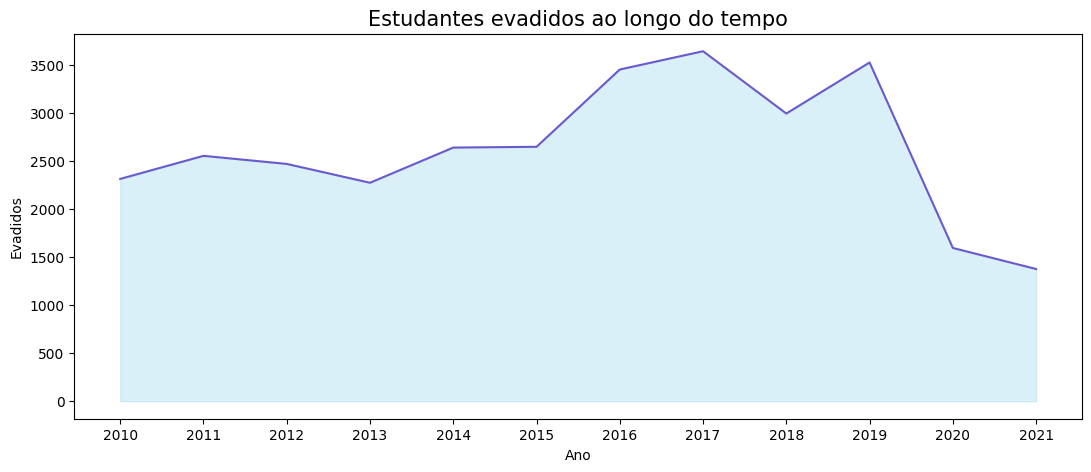

In [6]:
fig = plt.figure(figsize=(13,5))
plt.fill_between( anos, evadidos_por_ano, color="skyblue", alpha=0.3)
plt.xticks(range(2010,2022))
plt.plot(anos, evadidos_por_ano, color="slateblue")
plt.title("Estudantes evadidos ao longo do tempo", fontsize=15)
plt.xlabel("Ano")
plt.ylabel("Evadidos")
plt.show()

In [58]:
matriculados_por_ano = df.groupby('Ano')['Matriculados'].sum()
matriculados_por_ano 

Ano
2010    48467
2011    48077
2012    49038
2013    50526
2014    53266
2015    54735
2016    56879
2017    56951
2018    57493
2019    56431
2020    60779
2021    66240
Name: Matriculados, dtype: int64

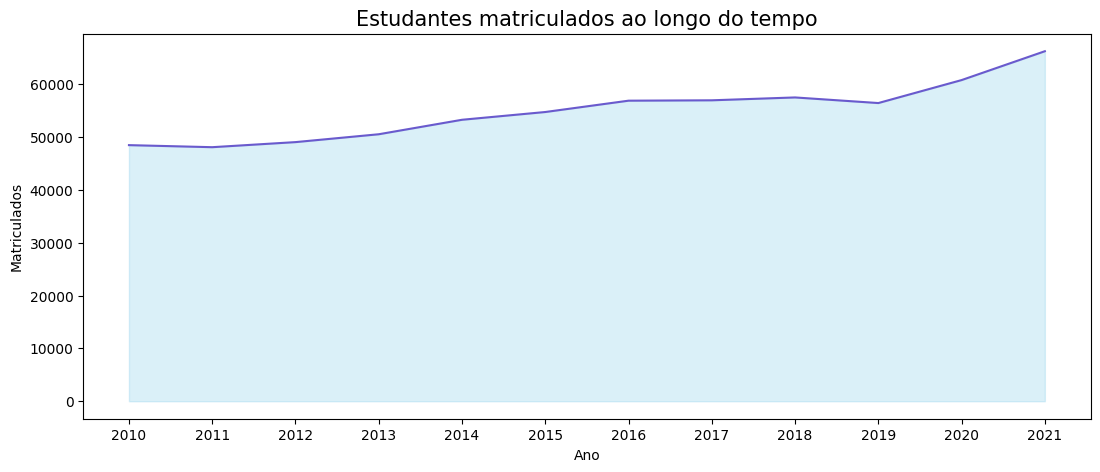

In [60]:
fig2 = plt.figure(figsize=(13,5))
plt.fill_between( anos, matriculados_por_ano, color="skyblue", alpha=0.3)
plt.xticks(range(2010,2022))
plt.plot(anos, matriculados_por_ano, color="slateblue")
plt.title("Estudantes matriculados ao longo do tempo", fontsize=15)
plt.xlabel("Ano")
plt.ylabel("Matriculados")
plt.show()

In [61]:
diplomados_por_ano = df.groupby('Ano')['Diplomados'].sum()
diplomados_por_ano

Ano
2010    3549
2011    3205
2012    3122
2013    3011
2014    2902
2015    2973
2016    3075
2017    3549
2018    3644
2019    3781
2020    2912
2021    3105
Name: Diplomados, dtype: int64

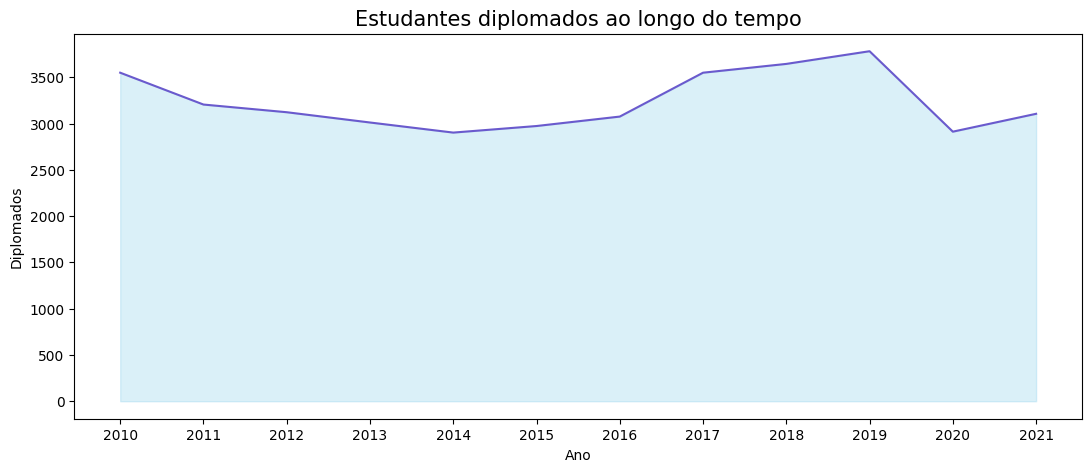

In [54]:
fig3 = plt.figure(figsize=(13,5))
plt.fill_between( anos, diplomados_por_ano, color="skyblue", alpha=0.3)
plt.xticks(range(2010,2022))
plt.plot(anos, diplomados_por_ano, color="slateblue")
plt.title("Estudantes diplomados ao longo do tempo", fontsize=15)
plt.xlabel("Ano")
plt.ylabel("Diplomados")
plt.show()

Próximo objetivo é classificar (rankear) os cursos por evasão ao longo do período analisado.

In [39]:
evadidos_porcurso = df.groupby(['NomeCurso'])['Evadidos'].sum()
# salva o resultado como um arquivo csv
# evadidos_porcurso.to_csv("dados/evadidos_porcurso.csv")


In [70]:
df_evasao = pd.read_csv("dados/evadidos_porcurso.csv")
df_evasao

,NomeCurso,Evadidos
0,ADMINISTRAÇÃO,1284
1,ADMINISTRAÇÃO - EAD,36
2,ADMINISTRAÇÃO PÚBLICA E SOCIAL,179
3,AGRONOMIA,397
4,ARQUITETURA E URBANISMO,358
...,...,...
90,SAÚDE COLETIVA,298
91,SERVIÇO SOCIAL,89
92,TEATRO,185
93,TECNOLOGIA EM DESENVOLVIMENTO RURAL - EAD,236


In [46]:
top10 = df_evasao[['NomeCurso','Evadidos']].sort_values('Evadidos',ascending=False).head(10)
top10

,NomeCurso,Evadidos
24,CIÊNCIAS SOCIAIS,1702
70,LETRAS,1552
60,FÍSICA,1405
72,MATEMÁTICA,1387
0,ADMINISTRAÇÃO,1284
87,QUÍMICA,1145
66,HISTÓRIA,1027
22,CIÊNCIAS ECONÔMICAS,933
35,EDUCAÇÃO FÍSICA,897
56,FARMÁCIA,884


In [47]:
top10 = df_evasao[['NomeCurso','Evadidos']].sort_values('Evadidos').head(10)
top10

,NomeCurso,Evadidos
44,ENGENHARIA DE GESTÃO DE ENERGIA - LITORAL NORTE,0
64,GEOGRAFIA - LITORAL NORTE,0
48,ENGENHARIA DE SERVIÇOS - LITORAL NORTE,1
19,CIÊNCIAS BIOLÓGICAS - LICENCIATURA - ENSINO A ...,3
29,DESENVOLVIMENTO REGIONAL - LITORAL NORTE,3
18,CIÊNCIAS BIOLÓGICAS - LICENCIATURA,9
86,PUBLICIDADE E PROPAGANDA,12
10,BIBLIOTECONOMIA - ENSINO A DISTÂNCIA - EAD,16
73,MATEMÁTICA - ENSINO A DISTÂNCIA - EAD,18
7,ARTES VISUAIS - ENSINO A DISTÂNCIA - EAD,24


In [73]:
media = matriculados_por_ano.mean()
media



2020
